In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn import tree

from sklearn.model_selection import GridSearchCV


In [2]:
import warnings
warnings.filterwarnings("ignore")

The Inter-American Development Bank is asking the Kaggle community for help with income qualification for some of the world's poorest families. Are you up for the challenge?

Here's the backstory: Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, one popular method uses an algorithm to verify income qualification. It’s called the Proxy Means Test (or PMT). With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

To improve on PMT, the IDB (the largest source of development financing for Latin America and the Caribbean) has turned to the Kaggle community. They believe that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

Beyond Costa Rica, many countries face this same problem of inaccurately assessing social need. If Kagglers can generate an improvement, the new algorithm could be implemented in other countries around the world.

## Importing datasets

In [3]:
costa_train = pd.read_csv('../data/train.csv')

In [4]:
costa_test = pd.read_csv('../data/test.csv')

In [5]:
costa_train.shape

(9557, 143)

In [6]:
costa_test.shape

(23856, 142)

In [7]:
costa_train.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.0,121.0,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,...,0,49,16,81,4,16.000000,1.0,100.0,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.0,100.0,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,...,121,784,16,81,4,16.000000,1.0,100.0,784,4


The file is a set of household characteristics from a representative sample of Costa Rican Households. The dataset has observations for each member of the household but the classification is done at the household level. That is, households cannot have two different classifications. Data is not presented at the household level so that participants can create their own household features from individual data.

In [8]:
costa_sample = pd.read_csv('../data/sample_submission.csv')
costa_sample.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [9]:
costa_train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
                    ...   
bedrooms             int64
overcrowding       float64
tipovivi1            int64
tipovivi2            int64
tipovivi3            int64
tipovivi4            int64
t

Response variable = 'Target'

In [10]:
costa_train['Target'].unique()

array([4, 2, 3, 1])

In [11]:
#data = pd.concat((costa_train, costa_test), axis=0)

In [12]:
#data.shape

### Ditching 'Id' column

In [13]:
costa_train = costa_train.drop(columns=['Id'])

In [14]:
costa_test = costa_test.drop(columns=['Id'])
#data = data.drop(columns=['Id'])

### Looking for missing values

In [15]:
len(costa_train)

9557

In [16]:
null_cols = costa_train.isna().sum()/len(costa_train)

null_cols[null_cols > 0]

v2a1         0.717798
v18q1        0.768233
rez_esc      0.829549
meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

In [17]:
drop_cols = list(null_cols[null_cols > 0.70].index) # removing columns with > 70% NAs
drop_cols


['v2a1', 'v18q1', 'rez_esc']

In [18]:
#data = data.drop(drop_cols, axis=1)
costa_train = costa_train.drop(drop_cols, axis=1)

In [19]:
costa_test = costa_test.drop(drop_cols, axis=1)

In [20]:
null_cols = costa_train.isna().sum()
null_cols[null_cols > 0]

meaneduc     5
SQBmeaned    5
dtype: int64

In [21]:
costa_train.dropna(inplace=True)
costa_test.dropna(inplace=True)

In [22]:
costa_train.drop(columns=['elimbasu5'], inplace=True)
costa_test.drop(columns=['elimbasu5'], inplace=True)

### Looking for multicollinearity


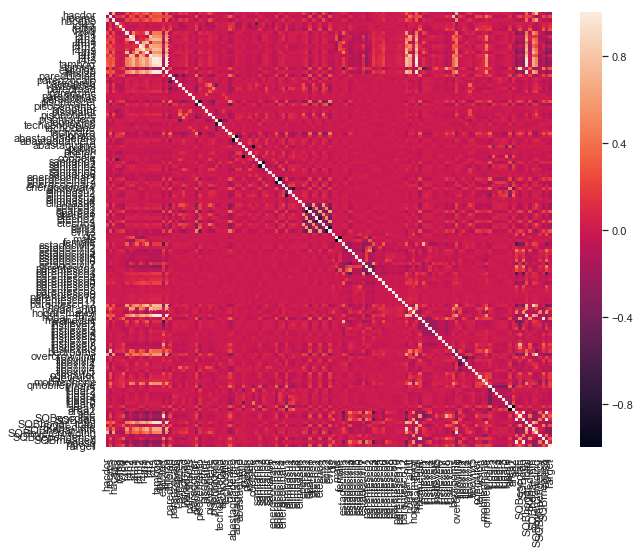

In [23]:
rcParams['figure.figsize'] = 10, 8
corr = costa_train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [24]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['tamhog',
 'tamviv',
 'hhsize',
 'hogar_total',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBovercrowding',
 'SQBmeaned',
 'agesq']

'SQBage' is age squared so it makes sense that it is highly correlated with 'agesq'
'tamhog' is size of the household, so it is identical with 'hhsize', household size == 'tamviv' == 'hogar_total'.
'SQBhogar_total' is hogar_total squared, so it is highly correlated with 'hogar_total'.
'SQBmeaned', square of the mean years of education of adults (>=18) in the household == 'SQBescolari', escolari squared
'hhsize' is highly correlated with 'r4t3', Total persons in the household (cf. correlation matrix)

In [25]:
costa_train = costa_train.drop(columns=to_drop)

In [26]:
costa_test = costa_test.drop(columns=to_drop)

In [27]:
corr = costa_train.corr()
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

[]

### Taking care of object columns

In [20]:
costa_train.select_dtypes(include=['object']).head(20)

,idhogar,dependency,edjefe,edjefa
0,21eb7fcc1,no,10,no
1,0e5d7a658,8,12,no
2,2c7317ea8,8,no,11
3,2b58d945f,yes,11,no
4,2b58d945f,yes,11,no
5,2b58d945f,yes,11,no
6,2b58d945f,yes,11,no
7,d6dae86b7,yes,9,no
8,d6dae86b7,yes,9,no
9,d6dae86b7,yes,9,no


* dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
* edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
* edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [28]:
costa_train['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [29]:
costa_train['edjefe'].value_counts()

no     3761
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       135
16      134
yes     123
10      111
12      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [30]:
### Changing 'edjefa' column values to '0' and '1' for Train and Test

In [31]:
costa_train.loc[costa_train['edjefa'].str.contains('no', regex=True), 'edjefa'] = '0'
costa_train.loc[costa_train['edjefa'].str.contains('yes', regex=True), 'edjefa'] = np.nan


In [32]:
costa_test.loc[costa_test['edjefe'].str.contains('no', regex=True), 'edjefe'] = '0'
costa_test.loc[costa_test['edjefe'].str.contains('yes', regex=True), 'edjefe'] = np.nan

In [33]:
costa_train.loc[costa_train['edjefe'].str.contains('no', regex=True), 'edjefe'] = '0'
costa_train.loc[costa_train['edjefe'].str.contains('yes', regex=True), 'edjefe'] = np.nan


In [34]:
costa_test.loc[costa_test['edjefa'].str.contains('no', regex=True), 'edjefa'] = '0'
costa_test.loc[costa_test['edjefa'].str.contains('yes', regex=True), 'edjefa'] = np.nan

In [35]:
costa_train.dropna(inplace=True)
costa_test.dropna(inplace=True)


In [36]:
costa_train['edjefa'].unique()

array(['0', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', '21', '12', '2', '20', '18'], dtype=object)

In [37]:
costa_test['edjefa'].unique()

array(['17', '0', '11', '14', '10', '15', '9', '6', '8', '3', '2', '5',
       '16', '12', '7', '13', '21', '4', '19', '18', '20'], dtype=object)

In [38]:
### Doing the same for 'edjefe'

In [39]:
costa_train['edjefe'].unique()

array(['10', '12', '0', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', '3', '18', '13', '20'], dtype=object)

In [40]:
costa_test['edjefe'].unique()


array(['0', '16', '10', '6', '11', '8', '13', '14', '5', '3', '9', '17',
       '15', '7', '21', '4', '12', '2', '20', '19', '18'], dtype=object)

In [41]:
### Dropping out Dependency column

In [42]:
costa_train['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [43]:
costa_train['dependency'].value_counts()

yes          2154
no           1722
.5           1467
2             712
1.5           683
.33333334     594
.66666669     482
8             355
.25           255
3             224
4             100
.75            91
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
.80000001      18
1.25           18
3.5            18
2.25           13
.71428573      12
1.2            11
1.75           11
.22222222      11
.83333331      11
.2857143        9
1.6666666       8
.60000002       8
.16666667       7
6               7
Name: dependency, dtype: int64

'Yes' and 'no' are too many in 'Dependency' column and we can't imagine 'yes' values

In [44]:
pd.concat((costa_train['dependency'].head(20), costa_train['SQBdependency'].head(20)), axis=1)

,dependency,SQBdependency
0,no,0.0
1,8,64.0
2,8,64.0
3,yes,1.0
4,yes,1.0
5,yes,1.0
6,yes,1.0
7,yes,1.0
8,yes,1.0
9,yes,1.0


In [45]:
costa_train['dependency'] = np.sqrt(costa_train['SQBdependency'])

In [46]:
costa_test['dependency'] = np.sqrt(costa_test['SQBdependency'])

### changing column type from object to integer

In [47]:
costa_train['edjefe'] = costa_train['edjefe'].astype('int')
costa_train['edjefa'] = costa_train['edjefa'].astype('int')
costa_test['edjefe'] = costa_test['edjefe'].astype('int')
costa_test['edjefa'] = costa_test['edjefa'].astype('int')

### Response variable : 'Target'

In [41]:
costa_train.Target.value_counts()

4    5914
2    1543
3    1173
1     730
Name: Target, dtype: int64

Text(0.5, 1.0, 'Counts of each Poverty level')

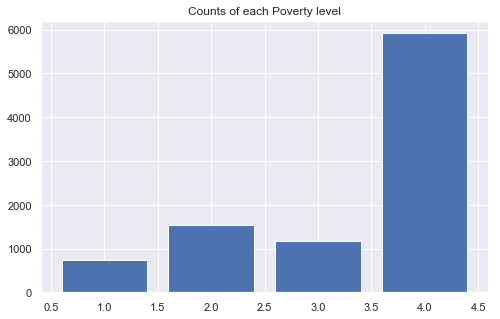

In [772]:
rcParams['figure.figsize'] = 8, 5

plt.bar(costa_train.Target.unique(), costa_train.Target.value_counts())
plt.title('Counts of each Poverty level')


In [42]:
costa_test.shape

(23387, 127)

In [43]:
costa_train.shape

(9360, 128)

### Household identifier and different Target for same household

* idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.

* parentesco1 - indicates if this person is the head of the household.

In [48]:
# Groupby the household and count nb of unique values. 
#It should be == 1 because every household members should have the same Target

sameTarget = costa_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

sameTarget.head()

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
Name: Target, dtype: bool

In [49]:
# Households where targets are not the same

diffTarget = sameTarget[sameTarget == False]

len(diffTarget)

82

There are 85 households where members don't have the same Target.

correct label is that for the head of household (parentesco1 == 1)

In [50]:
print(diffTarget[[0]])
costa_train[['idhogar', 'parentesco1', 'Target']][costa_train['idhogar'] == '0172ab1d9']

idhogar
0172ab1d9    False
Name: Target, dtype: bool


,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [51]:
""" 
Assigning new target values to every members in a same household

"""

for i in range(len(diffTarget)):
    #print(diffTarget[[i]].index[0])
    newtarget = costa_train['Target'][(costa_train['idhogar'] == diffTarget[[i]].index[0]) & (costa_train['parentesco1'] == 1)]
    #print(int(newtarget))
    costa_train['Target'][costa_train['idhogar'] == diffTarget[[i]].index[0]] = int(newtarget)
    
    #print(costa_train['Target'][costa_train['idhogar'] == diffTarget[[i]].index[0]])
    


In [52]:
## checking if all is ok
print(diffTarget[[0]])
costa_train[['idhogar', 'parentesco1', 'Target']][costa_train['idhogar'] == '0172ab1d9']

idhogar
0172ab1d9    False
Name: Target, dtype: bool


,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,3
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,3


In [780]:
### Number of heads of households

In [637]:
#head_household = costa_train.loc[costa_train['parentesco1'] == 1, :]
#head_household.shape

In [638]:
# 2970 heads of households

### Data is already splitted in training set and testing set

Main table is broken into two files for Train (with a Target column) and Test (without the Target column).

In [867]:
#len(costa_test)*100/(len(costa_test)+len(costa_train))

In [868]:
#Train = 29% ; Test (without 'Target') = 71%

## Splitting "Train" to training (80%) and testing sets (20%) 

In [53]:
print(costa_train.shape)
print(costa_train.shape[0]*0.8)
print(costa_train.shape[0]*0.2)

new_train = costa_train.sample(int(costa_train.shape[0]*0.8))
new_test = costa_train.sample(int(costa_train.shape[0]*0.2))


(9360, 128)
7488.0
1872.0


In [50]:
new_train.shape

(7488, 128)

In [54]:
y = new_train['Target']
X = new_train[[col for col in new_train.columns if (col != 'Target') & (col != 'idhogar')]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [55]:
print(X_train.shape)
print(y_train.shape)

(5990, 126)
(5990,)


In [56]:
print(X_test.shape)
print(y_test.shape)

(1498, 126)
(1498,)


### Model results into a dataframe

In [55]:
model_accuracies = pd.DataFrame()

model_accuracies = pd.DataFrame(columns = ['model', 'F1 score', 'precision', 'recall', 'accuracy'])


## Model 1: Decision Tree

# Si on veut que dans chaque fold, on est une quantité égale de chaque label

In [2]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


In [1070]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred_test_rf = clf.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_rf), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_rf))

print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_rf), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_rf, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_rf, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_rf, average='macro'), '\n')

Confusion matrix 
 [[116   3   0   4]
 [  3 203   5  28]
 [  5  10 160  21]
 [ 12  13  22 893]] 

Accuracy score 0.9158878504672897
balanced_accuracy_score:  0.8896970866109482 

Precision score:  [0.85294118 0.88646288 0.85561497 0.94397463]
Recall score : [0.94308943 0.84937238 0.81632653 0.95      ]
F1 score : 0.8864402830755841 



### Cross validation

In [1133]:
# 10 fold cross validation

cv_score = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv = 10, scoring='f1_weighted')
prec = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv = 10, scoring='precision_weighted')
rec = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv = 10, scoring='recall_weighted')
acc = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv = 10, scoring='accuracy')


In [1072]:
acc

array([0.8968386 , 0.895     , 0.91166667, 0.92153589, 0.9015025 ,
       0.88981636, 0.88461538, 0.88294314, 0.90133779, 0.89464883])

In [1134]:
cv_score = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv = 10, scoring='f1_weighted')
prec = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv = 10, scoring='precision_weighted')
rec = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv = 10, scoring='recall_weighted')
acc = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv = 10, scoring='accuracy')


model_accuracies = model_accuracies.append({'model': 'Decision_Tree', 
                                            #'accuracy': accuracy_score(y_test, y_pred_test_rf),
                                            'F1 score': np.mean(cv_score),
                                            'precision':np.mean(prec),
                                            'recall': np.mean(rec),
                                            'accuracy': np.mean(acc)},ignore_index=True)
                                         

In [1125]:
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.895912,0.898013,0.896822,0.89699


## Model 2: Random Forest classification


In [1076]:
costa_rf = RandomForestClassifier()

costa_rf = costa_rf.fit(X_train, y_train)


y_pred_test_rf = costa_rf.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_rf), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_rf))

print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_rf), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_rf, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_rf, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_rf, average='macro'), '\n')

Confusion matrix 
 [[109   2   1  11]
 [  9 191   5  34]
 [  6   5 147  38]
 [  4   5   4 927]] 

Accuracy score 0.9172229639519359
balanced_accuracy_score:  0.8553780636177233 

Precision score:  [0.8515625  0.9408867  0.93630573 0.91782178]
Recall score : [0.88617886 0.79916318 0.75       0.98617021]
F1 score : 0.8791024276626078 



### Cross validation

In [1135]:
# 10 fold cross validation
cv_score = cross_val_score(RandomForestClassifier(), X_train, y_train, scoring = 'f1_weighted', cv = 10)
cv_score

array([0.91135026, 0.90926522, 0.89426125, 0.91101829, 0.87920563,
       0.89812452, 0.88960879, 0.8945677 , 0.87411429, 0.88331113])

In [1136]:


cv_score = cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 10, scoring='f1_weighted')
prec = cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 10, scoring='precision_weighted')
rec = cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 10, scoring='recall_weighted')
acc = cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 10, scoring='accuracy')

model_accuracies = model_accuracies.append({'model': 'Random Forest', 
                                            #'accuracy': accuracy_score(y_test, y_pred_test_rf),
                                            'F1 score': np.mean(cv_score),
                                            'precision':np.mean(prec),
                                            'recall': np.mean(rec),
                                            'accuracy': np.mean(acc)},ignore_index=True)
                                         

### Feature importances

In [1137]:

feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': costa_rf.feature_importances_})
feature_importances.sort_values(by='importance', ascending=False).head(15)

,feature,importance
93,meaneduc,0.063092
125,SQBdependency,0.039299
90,dependency,0.035718
104,overcrowding,0.029369
113,qmobilephone,0.029165
123,SQBedjefe,0.026851
1,rooms,0.026321
91,edjefe,0.024526
15,escolari,0.022112
87,hogar_nin,0.021140


Most important variable is the average amount of education in the household

In [1163]:
rcParams['figure.figsize'] = 12, 4


In [1164]:
l = ['meaneduc', 'hogar_nin', 'dependency']

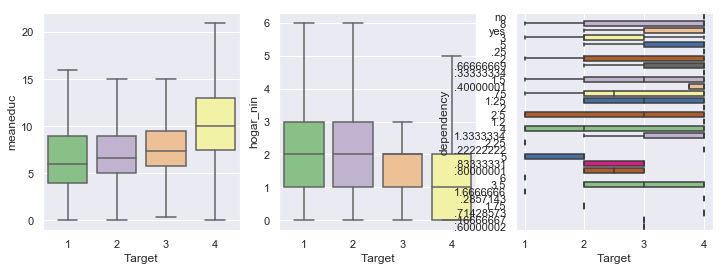

In [1165]:
fig = plt.figure()

for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    #a['feature']
    ax = sns.boxplot(x="Target", y = l[i-1], data = costa_train, showfliers=False, palette='Accent')
    #ax = sns.boxplot(x="Target", y="SQBdependency", data = costa_train)

#ax = sns.swarmplot(x="Target", y="meaneduc", data= costa_train, color=".25")

In [2]:

rcParams['figure.figsize'] = 20, 7


feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': costa_rf.feature_importances_})
feature_importances.sort_values(by='importance', ascending=False).head(10)

sns.barplot(x="feature", y="importance", data = feature_importances.sort_values(by='importance', ascending=False).head(10))
plt.xticks(rotation=45)


NameError: name 'pd' is not defined

In [1141]:
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.903523,0.898122,0.902833,0.902164
1,Random Forest,0.888991,0.897201,0.894159,0.892479


### Model 3: K-Neighbors (less performant)


Number of neighbors:  1
F1 score : 0.6665617635408434 

Number of neighbors:  3
F1 score : 0.6296989872622679 

Number of neighbors:  5
F1 score : 0.6266368954042657 

Number of neighbors:  7
F1 score : 0.6209688979905527 



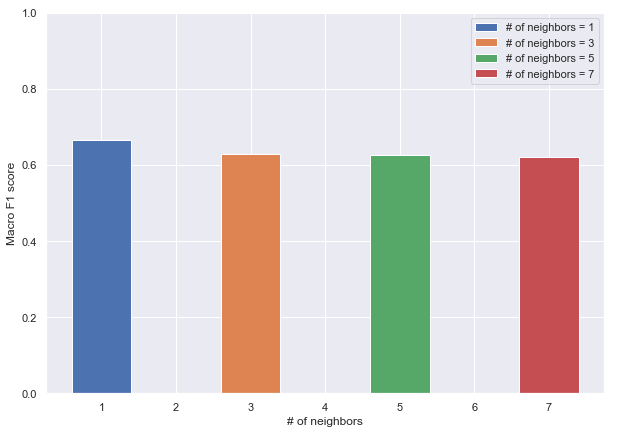

In [1142]:
# initialize and fit the model

rcParams['figure.figsize'] = 10, 7

for neighbors in [1, 3, 5, 7]:
    
    neighbor_model = KNeighborsClassifier(n_neighbors=neighbors)
    
    # 10 fold cross validation
    

    cv_score = cross_val_score(neighbor_model, X_train, y_train, cv = 10, scoring='f1_weighted')
    prec = cross_val_score(neighbor_model, X_train, y_train, cv = 10, scoring='precision_weighted')
    rec = cross_val_score(neighbor_model, X_train, y_train, cv = 10, scoring='recall_weighted')
    acc = cross_val_score(neighbor_model, X_train, y_train, cv = 10, scoring='accuracy')

    model_accuracies = model_accuracies.append({'model': 'Knn-'+str(neighbors), 
                                                'F1 score': np.mean(cv_score),
                                                'precision':np.mean(prec),
                                                'recall': np.mean(rec),
                                                'accuracy': np.mean(acc)},ignore_index=True)

    print('Number of neighbors: ', neighbors)
    
    print('F1 score :', np.mean(cv_score), '\n')
    
    
    plt.bar(neighbors, np.mean(cv_score))
    plt.gca().legend((['# of neighbors = ' + str(neighbors) for neighbors in range(1,9,2)]))
    plt.ylabel('Macro F1 score')
    plt.xlabel('# of neighbors')
    plt.ylim(0,1)
    
 

In [1143]:
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.903523,0.898122,0.902833,0.902164
1,Random Forest,0.888991,0.897201,0.894159,0.892479
2,Knn-1,0.666562,0.665099,0.669765,0.669765
3,Knn-3,0.629699,0.628350,0.642383,0.642383
4,Knn-5,0.626637,0.614974,0.646742,0.646742
5,Knn-7,0.620969,0.606236,0.654254,0.654254


## Model 4: Gradient Boosting

In [1087]:
costa_gb = GradientBoostingClassifier()



In [1088]:
costa_gb = GradientBoostingClassifier()

costa_gb = costa_gb.fit(X_train, y_train)


#costa_gb.fit(X_train, y_train)
y_pred_test_gb = costa_gb.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_gb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_gb))


print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_gb), '\n')
accuracy_score(y_test, y_pred_test_gb)


print('Precision score: ', precision_score(y_test, y_pred_test_gb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_gb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_gb, average='macro'), '\n')

Confusion matrix 
 [[ 68  15   2  38]
 [ 10 123   4 102]
 [  5  34  44 113]
 [  5  24   5 906]] 

Accuracy score 0.7616822429906542
balanced_accuracy_score:  0.5639523657680324 

Precision score:  [0.77272727 0.62755102 0.8        0.78170837]
Recall score : [0.55284553 0.51464435 0.2244898  0.96382979]
F1 score : 0.6059832092343886 



### Cross validation

In [1089]:
# 10 fold cross validation
cv_score = cross_val_score(GradientBoostingClassifier(), X_train, y_train, cv = 10)

In [1144]:


cv_score = cross_val_score(GradientBoostingClassifier(), X_train, y_train, cv = 10, scoring='f1_weighted')
prec = cross_val_score(GradientBoostingClassifier(), X_train, y_train, cv = 10, scoring='precision_weighted')
rec = cross_val_score(GradientBoostingClassifier(), X_train, y_train, cv = 10, scoring='recall_weighted')
acc = cross_val_score(GradientBoostingClassifier(), X_train, y_train, cv = 10, scoring='accuracy')

model_accuracies = model_accuracies.append({'model': "GradientBoosting", 
                                            'F1 score': np.mean(cv_score),
                                            'precision':np.mean(prec),
                                            'recall': np.mean(rec),
                                            'accuracy': np.mean(acc)},ignore_index=True)

In [1091]:
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.898206,0.900685,0.898994,0.897991
1,Random Forest,0.896206,0.892149,0.896490,0.894654
2,Knn-1,0.666562,0.665099,0.669765,0.669765
3,Knn-3,0.629699,0.628350,0.642383,0.642383
4,Knn-5,0.626637,0.614974,0.646742,0.646742
5,Knn-7,0.620969,0.606236,0.654254,0.654254
6,GradientBoosting,0.716619,0.733761,0.747246,0.747747


## Model 5: Gaussian Naive Bayes


In [1092]:
gnb = GaussianNB()
    

In [1093]:
gnb = gnb.fit(X_train, y_train)

#y_pred = gnb.fit(X_train, y_train)


y_pred_test_gnb = gnb.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_gnb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_gnb))

Confusion matrix 
 [[ 51   6  60   6]
 [ 38  17 167  17]
 [ 17   9 149  21]
 [ 42  14 448 436]] 

Accuracy score 0.43591455273698265


In [1094]:
print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_gnb), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_gnb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_gnb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_gnb, average='macro'), '\n')

balanced_accuracy_score:  0.4274494305802824 

Precision score:  [0.34459459 0.36956522 0.18082524 0.90833333]
Recall score : [0.41463415 0.07112971 0.76020408 0.46382979]
F1 score : 0.3504808448097563 



### Cross validation

In [1145]:
# 10 fold cross validation

cv_score = cross_val_score(GaussianNB(), X_train, y_train, cv = 10, scoring='f1_weighted')
prec = cross_val_score(GaussianNB(), X_train, y_train, cv = 10, scoring='precision_weighted')
rec = cross_val_score(GaussianNB(), X_train, y_train, cv = 10, scoring='recall_weighted')
acc = cross_val_score(GaussianNB(), X_train, y_train, cv = 10, scoring='accuracy')

model_accuracies = model_accuracies.append({'model': "Gaussian Naive Bayes", 
                                            'F1 score': np.mean(cv_score),
                                            'precision':np.mean(prec),
                                            'recall': np.mean(rec),
                                            'accuracy': np.mean(acc)},ignore_index=True)

In [1146]:
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.903523,0.898122,0.902833,0.902164
1,Random Forest,0.888991,0.897201,0.894159,0.892479
2,Knn-1,0.666562,0.665099,0.669765,0.669765
3,Knn-3,0.629699,0.628350,0.642383,0.642383
4,Knn-5,0.626637,0.614974,0.646742,0.646742
5,Knn-7,0.620969,0.606236,0.654254,0.654254
6,GradientBoosting,0.716471,0.733496,0.747747,0.747580
7,Gaussian Naive Bayes,0.464929,0.679592,0.426193,0.426193


## Model 6: Bagging classifier

In [1097]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [1098]:
    

bagging = bagging.fit(X_train, y_train)

#y_pred = bagging.fit(X_train, y_train)


y_pred_test_gnb = bagging.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_gnb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_gnb))

print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_gnb), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_gnb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_gnb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_gnb, average='macro'), '\n')

Confusion matrix 
 [[ 52  20   3  48]
 [ 16  90  14 119]
 [  2  23  45 126]
 [ 11  13   9 907]] 

Accuracy score 0.7303070761014686
balanced_accuracy_score:  0.49845467976378766 

Precision score:  [0.64197531 0.61643836 0.63380282 0.75583333]
Recall score : [0.42276423 0.37656904 0.22959184 0.96489362]
F1 score : 0.5405196480470893 



### Cross validation

In [1147]:
# 10 fold cross validation

cv_score = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 10, scoring='f1_weighted')
prec = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 10, scoring='precision_weighted')
rec = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 10, scoring='recall_weighted')
acc = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 10, scoring='accuracy')

model_accuracies = model_accuracies.append({'model': "Bagging Classifier", 
                                            'F1 score': np.mean(cv_score),
                                            'precision':np.mean(prec),
                                            'recall': np.mean(rec),
                                            'accuracy': np.mean(acc)},ignore_index=True)

In [1148]:
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.903523,0.898122,0.902833,0.902164
1,Random Forest,0.888991,0.897201,0.894159,0.892479
2,Knn-1,0.666562,0.665099,0.669765,0.669765
3,Knn-3,0.629699,0.628350,0.642383,0.642383
4,Knn-5,0.626637,0.614974,0.646742,0.646742
5,Knn-7,0.620969,0.606236,0.654254,0.654254
6,GradientBoosting,0.716471,0.733496,0.747747,0.747580
7,Gaussian Naive Bayes,0.464929,0.679592,0.426193,0.426193
8,Bagging Classifier,0.626637,0.614974,0.646742,0.646742


## Model 7: RBF SVM

In [1101]:
SVM = SVC()

In [1102]:


SVM = SVM.fit(X_train, y_train)

#y_pred = SVM.fit(X_train, y_train)


y_pred_test_SVM = SVM.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_SVM), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_SVM))

print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_SVM), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_SVM, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_SVM, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_SVM, average= 'macro'), '\n')

Confusion matrix 
 [[ 40  21   4  58]
 [ 16  64   5 154]
 [  2  25  24 145]
 [  7  18   6 909]] 

Accuracy score 0.692256341789052
balanced_accuracy_score:  0.42061398374958614 

Precision score:  [0.61538462 0.5        0.61538462 0.71800948]
Recall score : [0.32520325 0.26778243 0.12244898 0.96702128]
F1 score : 0.45066928078713964 



### Cross validation

In [1149]:
# 10 fold cross validation

cv_score = cross_val_score(SVC(), X_train, y_train, cv = 10, scoring='f1_weighted')
prec = cross_val_score(SVC(), X_train, y_train, cv = 10, scoring='precision_weighted')
rec = cross_val_score(SVC(), X_train, y_train, cv = 10, scoring='recall_weighted')
acc = cross_val_score(SVC(), X_train, y_train, cv = 10, scoring='accuracy')

model_accuracies = model_accuracies.append({'model': "RBF SVM", 
                                            'F1 score': np.mean(cv_score),
                                            'precision':np.mean(prec),
                                            'recall': np.mean(rec),
                                            'accuracy': np.mean(acc)},ignore_index=True)

In [1104]:
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.898206,0.900685,0.898994,0.897991
1,Random Forest,0.896206,0.892149,0.896490,0.894654
2,Knn-1,0.666562,0.665099,0.669765,0.669765
3,Knn-3,0.629699,0.628350,0.642383,0.642383
4,Knn-5,0.626637,0.614974,0.646742,0.646742
5,Knn-7,0.620969,0.606236,0.654254,0.654254
6,GradientBoosting,0.716619,0.733761,0.747246,0.747747
7,Gaussian Naive Bayes,0.464929,0.679592,0.426193,0.426193
8,Bagging Classifier,0.626637,0.614974,0.646742,0.646742
9,RBF SVM,0.621258,0.647618,0.684802,0.684802


### Changing columns type from object to integer

In [1150]:
X_train['edjefe'] = X_train['edjefe'].astype('int')
X_train['edjefa'] = X_train['edjefa'].astype('int')

In [1151]:

X_test['edjefe'] = X_test['edjefe'].astype('int')
X_test['edjefa'] = X_test['edjefa'].astype('int')

## Model 8: XGBoost

In [57]:

from xgboost import XGBClassifier

In [1108]:
xgb = XGBClassifier()

In [1109]:
xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)


#y_pred = SVM.fit(X_train, y_train)


y_pred_test_xgb = xgb.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_xgb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_xgb))



print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_xgb), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_xgb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_xgb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_SVM, average= 'macro'), '\n')

Confusion matrix 
 [[ 53  30   0  40]
 [  9 115   3 112]
 [  4  39  23 130]
 [  4  29   1 906]] 

Accuracy score 0.7323097463284379
balanced_accuracy_score:  0.4983106457674492 

Precision score:  [0.75714286 0.5399061  0.85185185 0.76262626]
Recall score : [0.43089431 0.48117155 0.11734694 0.96382979]
F1 score : 0.45066928078713964 



### Cross validation

In [1152]:
# 10 fold cross validation

cv_score = cross_val_score(XGBClassifier(), X_train, y_train, cv = 10, scoring='f1_weighted')
prec = cross_val_score(XGBClassifier(), X_train, y_train, cv = 10, scoring='precision_weighted')
rec = cross_val_score(XGBClassifier(), X_train, y_train, cv = 10, scoring='recall_weighted')
acc = cross_val_score(XGBClassifier(), X_train, y_train, cv = 10, scoring='accuracy')

model_accuracies = model_accuracies.append({'model': "XGBoost", 
                                            'F1 score': np.mean(cv_score),
                                            'precision':np.mean(prec),
                                            'recall': np.mean(rec),
                                            'accuracy': np.mean(acc)},ignore_index=True)

In [1111]:
cv_score


array([0.67245037, 0.69124739, 0.68569368, 0.67994722, 0.67416434,
       0.67894662, 0.66322024, 0.66828782, 0.67627231, 0.67977244])

In [1154]:
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.903523,0.898122,0.902833,0.902164
1,Random Forest,0.888991,0.897201,0.894159,0.892479
2,Knn-1,0.666562,0.665099,0.669765,0.669765
3,Knn-3,0.629699,0.628350,0.642383,0.642383
4,Knn-5,0.626637,0.614974,0.646742,0.646742
5,Knn-7,0.620969,0.606236,0.654254,0.654254
6,GradientBoosting,0.716471,0.733496,0.747747,0.747580
7,Gaussian Naive Bayes,0.464929,0.679592,0.426193,0.426193
8,Bagging Classifier,0.626637,0.614974,0.646742,0.646742
9,RBF SVM,0.621258,0.647618,0.684802,0.684802


## Model selection

In [1155]:
model_accuracies.sort_values(by = ['F1 score'], ascending=False, inplace=True)
model_accuracies

,model,F1 score,precision,recall,accuracy
0,Decision_Tree,0.903523,0.898122,0.902833,0.902164
1,Random Forest,0.888991,0.897201,0.894159,0.892479
6,GradientBoosting,0.716471,0.733496,0.747747,0.747580
10,XGBoost,0.677000,0.718474,0.722367,0.722367
2,Knn-1,0.666562,0.665099,0.669765,0.669765
3,Knn-3,0.629699,0.628350,0.642383,0.642383
4,Knn-5,0.626637,0.614974,0.646742,0.646742
8,Bagging Classifier,0.626637,0.614974,0.646742,0.646742
9,RBF SVM,0.621258,0.647618,0.684802,0.684802
5,Knn-7,0.620969,0.606236,0.654254,0.654254


In [1156]:
model_accuracies.to_csv('model_accuracies.csv', index=False)

In [1157]:
rcParams['figure.figsize'] = 14, 6

    
#model_accuracies.sort_values(by = ['F1 score'], ascending=False, inplace=True)
#model_accuracies.set_index('model', inplace = True)

#model_accuracies.plot.bar()
#plt.title('Model macro F1')
#plt.ylabel('Macro F1 score') 
#plt.xticks(rotation=45)

#model_accuracies.reset_index(inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

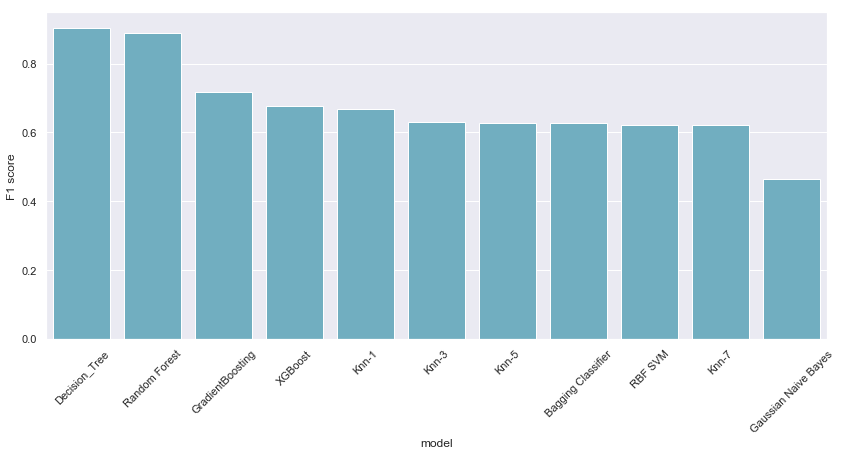

In [1158]:
    
model_accuracies.sort_values(by = ['F1 score'], ascending=False, inplace=True)
#model_accuracies.set_index('model', inplace = True)

#model_accuracies
ax = sns.barplot(x = 'model', y = 'F1 score', data = model_accuracies,ci=None, color="c")
plt.xticks(rotation=45)

#ax2 = sns.barplot(x = 'model', y = 'precision', data = model_accuracies,ci=None, color="c")

#model_accuracies.reset_index(inplace = True)

Ne pas travailler sur le TEST.
Sur le TRAIN, splitter en 80/20. Sur les 80, faire les cross val et le model selection.
Faire le Grid Search sur les 80.
Predire sur les 20.

## GridSearchCV on 80% TRAIN set

In [54]:
new_train.shape
#new_test.shape

(7488, 128)

In [55]:
X.shape

(7488, 126)

### a. Extracting IDs to predict of new_test
### b. Dropping Na's in new_test
### c. Dropping IDs in new_test

In [58]:
X_test_with_ID = new_test.dropna()
len(X_test_with_ID)

list_ID_test = X_test_with_ID[['idhogar', 'parentesco1']]
print(len(list_ID_test))
list_ID_test.head()

#len(list_ID_test['idhogar'].unique())


Costa_X_test = X_test_with_ID[[col for col in X_test_with_ID if (col != 'idhogar')]]
print(Costa_X_test.shape)
Costa_X_test.head()



1872
(1872, 127)


,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,lugar4,lugar5,lugar6,area1,area2,age,SQBedjefe,SQBhogar_nin,SQBdependency,Target
4848,0,4,0,1,1,0,1,1,2,0,...,0,0,0,0,1,3,0,4,4.000000,1
2916,0,5,0,1,1,0,0,2,2,0,...,0,0,0,1,0,41,0,0,0.250000,4
2036,0,5,0,1,1,1,0,1,1,0,...,0,0,0,1,0,26,0,0,0.000000,4
2096,0,5,0,1,1,0,0,1,1,0,...,0,0,0,1,0,27,0,1,0.111111,4
7073,0,4,0,1,1,0,1,1,2,1,...,0,0,0,0,1,4,25,16,4.000000,3


In [59]:
X.shape

(7488, 126)

In [60]:
Costa_X_test.shape

(1872, 127)

### 1. Random Forest classifier

Default parameters = ['n_estimators' = 10, 'max_depth'=  None]


In [1223]:

# Split the dataset in two parts
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)


# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': list(range(20,121, 10)), 'max_depth': [5, 10, 50, None], 'class_weight' : ['balanced', None]}]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score, '\n')

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,
                       scoring='%s_weighted' % score)
    clf.fit(X, y)

    print("Best parameters set found on development set:", '\n')

    print(clf.best_params_, '\n')

    print("Grid scores on development set:", '\n')

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params), '\n')

        
    #print("Detailed classification report:", '\n')

    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.", '\n')

    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred), '\n')

    

# Tuning hyper-parameters for f1 

Best parameters set found on development set: 

{'class_weight': 'balanced', 'max_depth': 50, 'n_estimators': 120} 

Grid scores on development set: 

0.647 (+/-0.025) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 20} 

0.644 (+/-0.025) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 30} 

0.653 (+/-0.019) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 40} 

0.651 (+/-0.032) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 50} 

0.654 (+/-0.030) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 60} 

0.652 (+/-0.028) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 70} 

0.653 (+/-0.031) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 80} 

0.658 (+/-0.022) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 90} 

0.657 (+/-0.027) for {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100} 

0.657 (+/-0.032) for 

### 2. Decision Tree classifier

Default parameters = ['splitter' = 'best', 'max_depth'= None]

The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


In [1224]:
# Split the dataset in two parts

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'splitter': ['best', 'random'], 'max_depth': [5, 10, 50, None]}]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score, '\n')

    
    clf = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, cv = 10,
                       scoring='%s_weighted' % score)
    clf.fit(X, y)

    print("Best parameters set found on development set:", '\n')

    print(clf.best_params_, '\n')

    print("Grid scores on development set:", '\n')

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params), '\n')

        
    #print("Detailed classification report:", '\n')
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.", '\n')

    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred), '\n')

    

# Tuning hyper-parameters for f1 

Best parameters set found on development set: 

{'max_depth': 50, 'splitter': 'best'} 

Grid scores on development set: 

0.617 (+/-0.025) for {'max_depth': 5, 'splitter': 'best'} 

0.598 (+/-0.032) for {'max_depth': 5, 'splitter': 'random'} 

0.762 (+/-0.037) for {'max_depth': 10, 'splitter': 'best'} 

0.746 (+/-0.034) for {'max_depth': 10, 'splitter': 'random'} 

0.929 (+/-0.015) for {'max_depth': 50, 'splitter': 'best'} 

0.922 (+/-0.030) for {'max_depth': 50, 'splitter': 'random'} 

0.927 (+/-0.015) for {'max_depth': None, 'splitter': 'best'} 

0.915 (+/-0.049) for {'max_depth': None, 'splitter': 'random'} 



### 3. Gradient Boosting

In [62]:
# Split the dataset in two parts

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': list(range(50,121, 10)), 'max_depth': [5, None]}]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score, '\n')

    
    clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv = 10,
                       scoring='%s_weighted' % score)
    clf.fit(X, y)

    print("Best parameters set found on development set:", '\n')

    print(clf.best_params_, '\n')

    print("Grid scores on development set:", '\n')

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params), '\n')

        
    #print("Detailed classification report:", '\n')
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.", '\n')

    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred), '\n')

    

# Tuning hyper-parameters for f1 

Best parameters set found on development set: 

{'max_depth': None, 'n_estimators': 60} 

Grid scores on development set: 

0.790 (+/-0.026) for {'max_depth': 5, 'n_estimators': 50} 

0.806 (+/-0.022) for {'max_depth': 5, 'n_estimators': 60} 

0.817 (+/-0.020) for {'max_depth': 5, 'n_estimators': 70} 

0.828 (+/-0.019) for {'max_depth': 5, 'n_estimators': 80} 

0.838 (+/-0.021) for {'max_depth': 5, 'n_estimators': 90} 

0.848 (+/-0.026) for {'max_depth': 5, 'n_estimators': 100} 

0.856 (+/-0.028) for {'max_depth': 5, 'n_estimators': 110} 

0.862 (+/-0.027) for {'max_depth': 5, 'n_estimators': 120} 

0.946 (+/-0.016) for {'max_depth': None, 'n_estimators': 50} 

0.947 (+/-0.017) for {'max_depth': None, 'n_estimators': 60} 

0.946 (+/-0.017) for {'max_depth': None, 'n_estimators': 70} 

0.947 (+/-0.015) for {'max_depth': None, 'n_estimators': 80} 

0.946 (+/-0.017) for {'max_depth': None, 'n_estimators': 90} 

0.946 (+/-0.015) for {'max_depth': None, 'n

### XGBoost

In [63]:
# Split the dataset in two parts

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': list(range(50,121, 10)), 'max_depth': [3, 5]}]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score, '\n')

    
    clf = GridSearchCV(XGBClassifier(), tuned_parameters, cv = 10,
                       scoring='%s_weighted' % score)
    clf.fit(X, y)

    print("Best parameters set found on development set:", '\n')

    print(clf.best_params_, '\n')

    print("Grid scores on development set:", '\n')

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params), '\n')

        
    #print("Detailed classification report:", '\n')
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.", '\n')

    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred), '\n')

    

# Tuning hyper-parameters for f1 

Best parameters set found on development set: 

{'max_depth': 5, 'n_estimators': 120} 

Grid scores on development set: 

0.647 (+/-0.021) for {'max_depth': 3, 'n_estimators': 50} 

0.653 (+/-0.019) for {'max_depth': 3, 'n_estimators': 60} 

0.664 (+/-0.023) for {'max_depth': 3, 'n_estimators': 70} 

0.673 (+/-0.027) for {'max_depth': 3, 'n_estimators': 80} 

0.678 (+/-0.029) for {'max_depth': 3, 'n_estimators': 90} 

0.686 (+/-0.026) for {'max_depth': 3, 'n_estimators': 100} 

0.691 (+/-0.030) for {'max_depth': 3, 'n_estimators': 110} 

0.697 (+/-0.030) for {'max_depth': 3, 'n_estimators': 120} 

0.739 (+/-0.043) for {'max_depth': 5, 'n_estimators': 50} 

0.754 (+/-0.045) for {'max_depth': 5, 'n_estimators': 60} 

0.766 (+/-0.044) for {'max_depth': 5, 'n_estimators': 70} 

0.777 (+/-0.036) for {'max_depth': 5, 'n_estimators': 80} 

0.784 (+/-0.034) for {'max_depth': 5, 'n_estimators': 90} 

0.792 (+/-0.031) for {'max_depth': 5, 'n_estimators': 100} 


## Predictions on X_Test

In [1052]:
new_test.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,lugar4,lugar5,lugar6,area1,area2,age,SQBedjefe,SQBhogar_nin,SQBdependency,Target
978,0,4,0,1,1,0,0,0,0,0,...,0,0,0,1,0,16,0,1,1.00,2
4960,0,4,0,1,1,1,0,1,1,0,...,0,0,0,0,1,15,36,1,0.25,4
8962,0,6,0,1,1,0,1,3,4,0,...,0,0,1,1,0,15,36,4,1.00,2
4209,0,6,0,1,1,0,0,2,2,0,...,0,0,0,1,0,18,0,1,0.25,4
6702,0,4,0,1,1,0,0,3,3,0,...,0,0,0,1,0,22,49,0,0.00,4


In [1051]:
new_test.shape

(1872, 128)

## Decision tree model

In [66]:
# Training on entire TRAIN SET
y_train = new_train['Target']
X_train = new_train[[col for col in new_train.columns if (col != 'Target') & (col != 'idhogar')]]

y_test = new_test['Target']
X_test = new_test[[col for col in Costa_X_test.columns if (col != 'Target')]]

# model with updated parameters
costa_tree = tree.DecisionTreeClassifier(splitter = 'best', max_depth = 50)
costa_tree.fit(X_train, y_train)

y_pred_test_tree = costa_tree.predict(X_test)


y_pred_test_tree.shape


(1872,)

In [67]:

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_tree), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_tree))


print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_tree), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_tree, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_tree, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_tree, average= 'macro'), '\n')

Confusion matrix 
 [[ 131    2    2    1]
 [   0  266    1    4]
 [   0    2  247    5]
 [   2    2    1 1206]] 

Accuracy score 0.9882478632478633
balanced_accuracy_score:  0.9782743088349928 

Precision score:  [0.98496241 0.97794118 0.98406375 0.99177632]
Recall score : [0.96323529 0.98154982 0.97244094 0.99587118]
F1 score : 0.9814393050865262 



In [1058]:
list_ID_test.head()

,idhogar,parentesco1
978,307f046e7,0
4960,589b36aa5,0
8962,2b42b5570,0
4209,256dfbc43,0
6702,13e76db42,0


In [1057]:
list_ID_test.shape

(1872, 2)

In [1060]:
#hyperparam_final = pd.DataFrame({'ID': list_ID_test['idhogar'], 'parentesco1' : list_ID_test['parentesco1'], 'Target' : test_predictions})

hyperparam_final = pd.DataFrame({'ID': list_ID_test['idhogar'], 'Target' : y_pred_test_rf, 'True y': y_test})

hyperparam_final.head(10)


,ID,Target,True y
978,307f046e7,2,2
4960,589b36aa5,4,4
8962,2b42b5570,2,2
4209,256dfbc43,4,4
6702,13e76db42,4,4
8426,85d809008,3,3
3214,201610907,2,2
2303,b686896bc,2,2
7589,09e25d616,2,2
3581,4a42abb16,4,4


## RF

In [68]:
# Training on entire TRAIN SET
y_train = new_train['Target']
X_train = new_train[[col for col in new_train.columns if (col != 'Target') & (col != 'idhogar')]]

y_test = new_test['Target']
X_test = new_test[[col for col in Costa_X_test.columns if (col != 'Target')]]

# model with updated parameters
costa_rf = RandomForestClassifier(class_weight = 'balanced', n_estimators = 120, max_depth = 50)
costa_rf.fit(X_train, y_train)

y_pred_test_rf = costa_rf.predict(X_test)



print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_rf), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_rf))


print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_rf), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_rf, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_rf, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_rf, average= 'macro'), '\n')

Confusion matrix 
 [[ 132    0    0    4]
 [   0  267    1    3]
 [   0    3  247    4]
 [   0    1    1 1209]] 

Accuracy score 0.9909188034188035
balanced_accuracy_score:  0.9816543762278607 

Precision score:  [1.         0.98523985 0.99196787 0.99098361]
Recall score : [0.97058824 0.98523985 0.97244094 0.99834847]
F1 score : 0.9867685603865298 



In [1064]:
#hyperparam_final = pd.DataFrame({'ID': list_ID_test['idhogar'], 'parentesco1' : list_ID_test['parentesco1'], 'Target' : test_predictions})

hyperparam_final = pd.DataFrame({'ID': list_ID_test['idhogar'], 'Target' : y_pred_test_tree, 'True y': y_test})

hyperparam_final.head(10)


,ID,Target,True y
978,307f046e7,2,2
4960,589b36aa5,4,4
8962,2b42b5570,2,2
4209,256dfbc43,4,4
6702,13e76db42,4,4
8426,85d809008,3,3
3214,201610907,2,2
2303,b686896bc,2,2
7589,09e25d616,2,2
3581,4a42abb16,4,4


### Gradient Boosting

In [73]:
y_train = new_train['Target']
X_train = new_train[[col for col in new_train.columns if (col != 'Target') & (col != 'idhogar')]]

y_test = new_test['Target']
X_test = new_test[[col for col in Costa_X_test.columns if (col != 'Target')]]

costa_gb = GradientBoostingClassifier(n_estimators = 60, max_depth = None)

costa_gb.fit(X_train, y_train)


#costa_gb.fit(X_train, y_train)
y_pred_test_gb = costa_gb.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_gb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_gb))


print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_gb), '\n')
accuracy_score(y_test, y_pred_test_gb)


print('Precision score: ', precision_score(y_test, y_pred_test_gb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_gb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_gb, average='macro'), '\n')

Confusion matrix 
 [[ 130    0    1    5]
 [   0  268    1    2]
 [   1    1  251    1]
 [   0    0    5 1206]] 

Accuracy score 0.9909188034188035
balanced_accuracy_score:  0.9822180998650754 

Precision score:  [0.99236641 0.99628253 0.97286822 0.99341021]
Recall score : [0.95588235 0.98892989 0.98818898 0.99587118]
F1 score : 0.9853708223464763 



### XGBoost

In [69]:
y_train = new_train['Target']
X_train = new_train[[col for col in new_train.columns if (col != 'Target') & (col != 'idhogar')]]

y_test = new_test['Target']
X_test = new_test[[col for col in Costa_X_test.columns if (col != 'Target')]]

In [70]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(7488,)
(1872,)
(7488, 126)
(1872, 126)


In [1182]:
y_pred_test_xgb.shape

(1872,)

In [71]:
xgb = XGBClassifier(n_estimators = 120, max_depth = 5)
xgb = xgb.fit(X_train, y_train)


#y_pred = SVM.fit(X_train, y_train)


y_pred_test_xgb = xgb.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_xgb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_xgb))



print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_xgb), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_xgb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_xgb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_xgb, average= 'macro'), '\n')

Confusion matrix 
 [[  98    4    2   32]
 [   0  186    4   81]
 [   2   18  147   87]
 [   0   15    3 1193]] 

Accuracy score 0.8675213675213675
balanced_accuracy_score:  0.742702876818818 

Precision score:  [0.98       0.83408072 0.94230769 0.85642498]
Recall score : [0.72058824 0.68634686 0.57874016 0.98513625]
F1 score : 0.804225181161009 



4    1089
3     323
2     297
1     163
Name: Target, dtype: int64

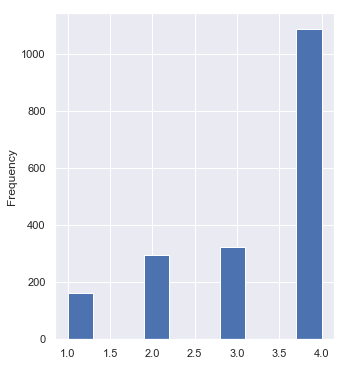

In [1061]:
# Plot the predicted labels

rcParams['figure.figsize'] = 5, 6

hyperparam_final['Target'].sort_index().plot.hist()
hyperparam_final['Target'].value_counts()

4    4716
2    1190
3     966
1     616
Name: Target, dtype: int64

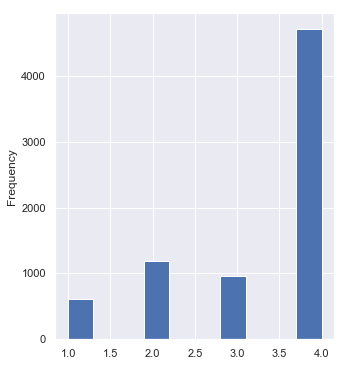

In [971]:
new_train['Target'].sort_index().plot.hist()
new_train['Target'].value_counts()

In [1187]:
costa_test.shape

(23856, 142)

In [1189]:
costa_test.isna().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
v14a                   0
refrig                 0
v18q                   0
v18q1              18126
r4h1                   0
r4h2                   0
r4h3                   0
r4m1                   0
r4m2                   0
r4m3                   0
r4t1                   0
r4t2                   0
r4t3                   0
tamhog                 0
tamviv                 0
escolari               0
rez_esc            19653
hhsize                 0
paredblolad            0
paredzocalo            0
paredpreb              0
pareddes               0
paredmad               0
paredzinc              0
paredfibras            0
                   ...  
instlevel9             0
bedrooms               0
overcrowding           0
tipovivi1              0
tipovivi2              0
tipovivi3              0
tipovivi4              0
tipovivi5              0
computer               0


## Not used

### Applying cross-validation RF model to predict Test dataset


NB: Submission file 
* This file contains all test IDs and a default value.
* Note that ONLY the heads of household are used in scoring. All household members are included in test + the sample submission, but only heads of households are scored.

In [670]:
costa_test.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBedjefe,SQBhogar_nin,SQBdependency
0,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,4,0,1,0.25
1,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,41,0,1,0.25
2,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,41,0,1,0.25
3,0,14,0,1,1,1,0,1,1,0,...,0,0,0,0,1,0,59,256,0,0.00
5,0,3,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,38,0,0,0.00


In [671]:
len(costa_test.dropna())

23387

### Applying model on entire TRAIN set

#### Dropping Na's in Costa_test  and extracting list of IDs to predict

In [672]:
X_test_with_ID = costa_test.dropna()
len(X_test_with_ID)

23387

In [673]:
X_test_with_ID = costa_test.dropna()
len(X_test_with_ID)

list_ID_test = X_test_with_ID[['idhogar', 'parentesco1']]
print(len(list_ID_test))
list_ID_test.head()

23387


,idhogar,parentesco1
0,72958b30c,0
1,72958b30c,0
2,72958b30c,1
3,5b598fbc9,1
5,8ee7365a8,0


In [674]:
X_test_with_ID = costa_test.dropna()
len(X_test_with_ID)

list_ID_test = X_test_with_ID[['idhogar', 'parentesco1']]
print(len(list_ID_test))
list_ID_test.head()

len(list_ID_test['idhogar'].unique())


7178

#### Dropping IDs of Costa_X_test

In [675]:
X_test_with_ID = costa_test.dropna()
len(X_test_with_ID)

list_ID_test = X_test_with_ID[['idhogar', 'parentesco1']]
print(len(list_ID_test))
list_ID_test.head()

len(list_ID_test['idhogar'].unique())


Costa_X_test = X_test_with_ID[[col for col in X_test_with_ID if (col != 'idhogar')]]
len(Costa_X_test)
Costa_X_test.head()

predictions = pd.DataFrame({'ID': list_ID_test['idhogar'], 'parentesco1' : list_ID_test['parentesco1'], 'Target' : y_pred})


23387

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBedjefe,SQBhogar_nin,SQBdependency
0,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,4,0,1,0.25
1,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,41,0,1,0.25
2,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,41,0,1,0.25
3,0,14,0,1,1,1,0,1,1,0,...,0,0,0,0,1,0,59,256,0,0.00
5,0,3,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,38,0,0,0.00


#### Training model on the entire Training set

In [230]:
X = costa_train[[col for col in costa_train if (col != 'Target') & (col != 'idhogar')]]
len(X)

9360

In [231]:
Y = costa_train['Target']
len(Y)

9360

In [232]:
# Init RF model

model_rf_cv = RandomForestClassifier()

# 12 fold cross validation
cv_score = cross_val_score(model_rf_cv, X, y, cv = 10)

model_rf_cv.fit(X, y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### predicting on Costa_X_Test

In [233]:
y_pred = model_rf_cv.predict(Costa_X_test)
print(len(y_pred))

23387


In [234]:
y_pred[:50]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 3, 3, 3, 3])

#### Merging list of IDs and predictions

In [235]:
predictions = pd.DataFrame({'ID': list_ID_test['idhogar'], 'parentesco1' : list_ID_test['parentesco1'], 'Target' : y_pred})



In [236]:
predictions.tail(20)

,ID,parentesco1,Target
23836,e44cb9969,1,2
23837,935a65ffa,0,2
23838,935a65ffa,0,2
23839,935a65ffa,0,2
23840,935a65ffa,0,3
23841,935a65ffa,1,3
23842,935a65ffa,0,2
23843,2edb6f51e,1,1
23844,2edb6f51e,0,4
23845,2edb6f51e,0,4


In [237]:
# several household members

#len(predictions.ID.unique())


4    17280
2     3171
3     1603
1     1333
Name: Target, dtype: int64

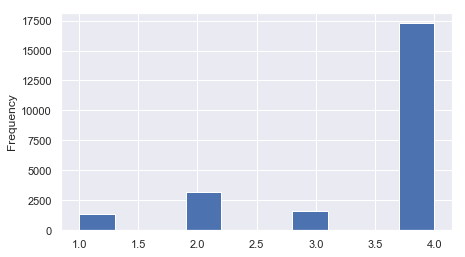

In [238]:
# Plot the predicted labels

rcParams['figure.figsize'] = 7, 4

predictions['Target'].sort_index().plot.hist()
predictions['Target'].value_counts()

## Predictions must be made by household
If several targets are predicted for one hosuehold, target of household is head household's

In [239]:
len(predictions.ID.unique())


7178

In [240]:
len(predictions.ID.unique())

result = predictions[['ID', 'Target']][predictions['parentesco1'] == 1]
len(result)

7160

### Some households are missing in the prediction

In [241]:
groupby = predictions['Target'].groupby([predictions['ID']]).unique()
#groupby.index

In [242]:
len(groupby.index)

7178

In [243]:
groupby.head(15)

ID
000a08204       [4]
000bce7c4       [4]
001845fb0       [4]
003514e22       [4]
003b51a87    [4, 1]
003bf2fa9       [2]
004417a6c       [4]
0044a5929       [4]
00498cd58       [3]
004ea2211       [4]
005411ee8    [4, 3]
00564e3ca       [4]
0065a3821       [2]
008222963       [4]
0082c4eb2       [4]
Name: Target, dtype: object

### 18 Households with no head

In [244]:
[household for household in predictions['ID'].tolist() if household not in result['ID'].tolist()]


['b59f5b526',
 '9d874b0d6',
 '198fc274a',
 'ce6154327',
 'e3f69768c',
 'df06e01c6',
 'df06e01c6',
 'f6d6fad32',
 '5a667591a',
 '2dc45d484',
 'fc6c8d241',
 'fc6c8d241',
 'e4df1caaf',
 'e4df1caaf',
 'f2fd28dbb',
 'f2fd28dbb',
 'f2fd28dbb',
 'f2fd28dbb',
 'd678c45ad',
 '0e2a3453d',
 '0e2a3453d',
 'b115b4536',
 '91aff0a8e',
 '91aff0a8e',
 '676750a21',
 'd14b3e03a']

In [245]:
# example:

predictions[predictions['ID']=='f2fd28dbb']

,ID,parentesco1,Target
21654,f2fd28dbb,0,3
21655,f2fd28dbb,0,3
21656,f2fd28dbb,0,3
21657,f2fd28dbb,0,3


### 18 households with no head and 18 Targets

In [246]:
house_nohead = predictions.loc[predictions['ID'].isin([household for household in predictions['ID'].tolist() if household not in result['ID'].tolist()])]
house_nohead


,ID,parentesco1,Target
12753,b59f5b526,0,4
15090,9d874b0d6,0,4
15544,198fc274a,0,2
17053,ce6154327,0,4
17132,e3f69768c,0,4
17162,df06e01c6,0,4
17163,df06e01c6,0,4
18549,f6d6fad32,0,2
18643,5a667591a,0,4
18735,2dc45d484,0,4


In [247]:
len(house_nohead['ID'].unique())

18

In [248]:
house_nohead = house_nohead.drop_duplicates()
house_nohead

,ID,parentesco1,Target
12753,b59f5b526,0,4
15090,9d874b0d6,0,4
15544,198fc274a,0,2
17053,ce6154327,0,4
17132,e3f69768c,0,4
17162,df06e01c6,0,4
18549,f6d6fad32,0,2
18643,5a667591a,0,4
18735,2dc45d484,0,4
19299,fc6c8d241,0,4


### Dropping household with members with different Targets/keeping one row

In [249]:
house_nohead.groupby('ID').filter(lambda x: len(x) > 1)

,ID,parentesco1,Target
19299,fc6c8d241,0,4
19300,fc6c8d241,0,2


In [250]:
### keeping this one

house_nohead.groupby('ID').filter(lambda x: len(x) > 1)[:1]

,ID,parentesco1,Target
19299,fc6c8d241,0,4


In [251]:
tokeep = pd.concat((house_nohead.groupby('ID').filter(lambda x: len(x) == 1), house_nohead.groupby('ID').filter(lambda x: len(x) > 1)[:1]))
tokeep

,ID,parentesco1,Target
12753,b59f5b526,0,4
15090,9d874b0d6,0,4
15544,198fc274a,0,2
17053,ce6154327,0,4
17132,e3f69768c,0,4
17162,df06e01c6,0,4
18549,f6d6fad32,0,2
18643,5a667591a,0,4
18735,2dc45d484,0,4
19317,e4df1caaf,0,2


In [252]:
len(tokeep)

18

## Final result

In [253]:
final = result.append(tokeep.drop(columns=['parentesco1']))
len(final)

7178

In [264]:
final.head(15)

,ID,Target
2,72958b30c,4
3,5b598fbc9,4
6,8ee7365a8,4
8,ff69a6fc8,4
9,b61e2bb92,4
12,a499b6c30,4
13,f751b9e44,4
21,ba1262b51,4
23,d5a0a19d8,4
25,23eb5e435,4


4    5548
2     852
3     450
1     328
Name: Target, dtype: int64

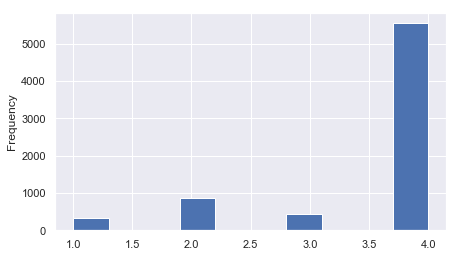

In [255]:
# Plot the predicted labels

rcParams['figure.figsize'] = 7, 4

final['Target'].sort_index().plot.hist()
final['Target'].value_counts()

Grid Search

On combine autant de paramètres que de modèles

max depth = [a, b]
n_estimators = [i, j, k]

GridSearchCV

je sélectionne le modèle avec les hyperparamètres qui ont les meilleurs scores sur le TRAIN
puis je l'applique sur le TEST

In [ ]:
# lancer plein de modèles avec 1 CV pour justifier mon choix de modèle
# pour le modèle choisi, itérer Grid Search : 1 CV par jeu de paramètres